In [2]:
import numpy as np

In [3]:
with open('simple.txt','r') as file:
    lines = file.readlines()

lines_ = []
for line in lines:
    lines_.append(line.strip())

lines = lines_

In [4]:
rows = len(lines)
cols = len(lines[0])

grid = np.zeros((rows, cols), dtype=object)

for line_idx, line in enumerate(lines):
    for element_idx, element in enumerate(line):
       grid[line_idx, element_idx] = element  


In [16]:
import networkx as nx

G = nx.Graph()

for row_idx, row in enumerate(grid):
    for col_idx, element in enumerate(row):
        G.add_node((row_idx, col_idx))

for row_idx, row in enumerate(grid):
    for col_idx, element in enumerate(row):
        if row_idx > 0:
            G.add_edge((row_idx, col_idx), (row_idx-1, col_idx), weight=int(grid[row_idx-1, col_idx]))
        if row_idx < rows-1:
            G.add_edge((row_idx, col_idx), (row_idx+1, col_idx), weight=int(grid[row_idx-1, col_idx]))
        if col_idx > 0:
            G.add_edge((row_idx, col_idx), (row_idx, col_idx-1), weight=int(grid[row_idx-1, col_idx]))
        if col_idx < cols-1:
            G.add_edge((row_idx, col_idx), (row_idx, col_idx+1), weight=int(grid[row_idx-1, col_idx]))


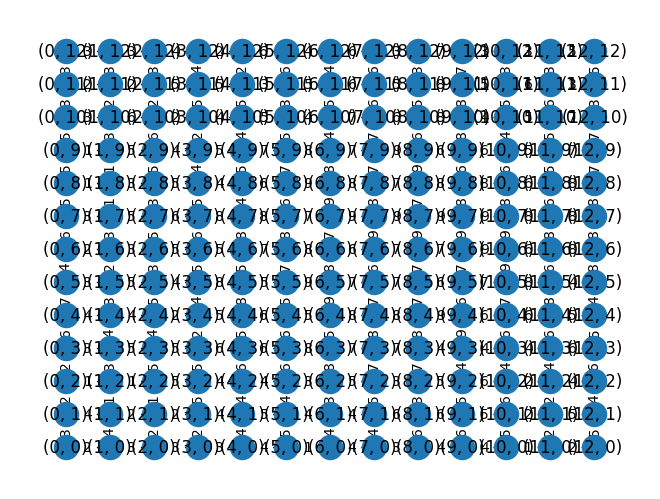

In [23]:
import matplotlib.pyplot as plt
pos = {node: node for node in G.nodes()}
nx.draw(G, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [18]:
#find shortest path
path = nx.shortest_path(G, (0,0), (rows-1, cols-1), weight='weight')

In [20]:
#sum weights of path
sum_ = 0
for node in path:
    sum_ += int(grid[node])
    

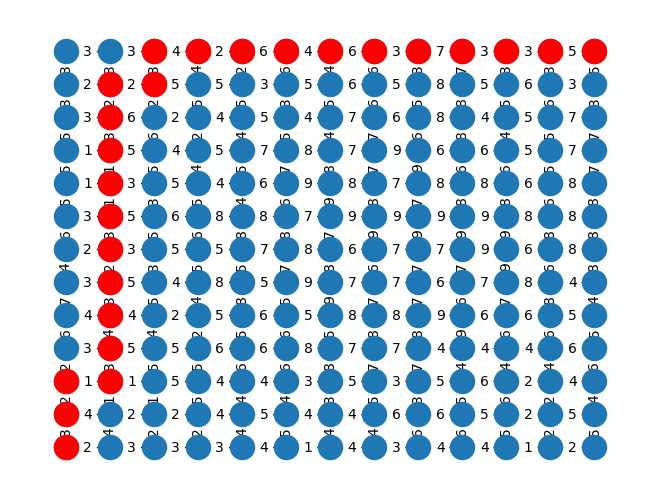

In [22]:
#visualize path
import matplotlib.pyplot as plt
pos = {node: node for node in G.nodes()}
nx.draw(G, pos=pos, with_labels=False)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
plt.show()


In [ ]:
MAX_BLOCKS_BEFORE_TURN = 3
previous_move = None

def get_possible_moves(grid, previous_move, current_position, current_blocks_since_turn):
    if ((previous_move == 'up') or (previous_move == 'down')) and current_blocks_since_turn == MAX_BLOCKS_BEFORE_TURN:
        possible_moves = ['right', 'left']
        return possible_moves, 0
    if ((previous_move == 'left') or (previous_move == 'right')) and current_blocks_since_turn == MAX_BLOCKS_BEFORE_TURN:
        possible_moves = ['up', 'down']
        return possible_moves, 0
    if (previous_move == 'up'):
        possible_moves = ['up', 'right', 'left']
        return possible_moves, current_blocks_since_turn+1
    if (previous_move == 'down'):
        possible_moves = ['down', 'right', 'left']
        return possible_moves, current_blocks_since_turn+1
    if (previous_move == 'left'):
        possible_moves = ['up', 'down', 'left']
        return possible_moves, current_blocks_since_turn+1
    if (previous_move == 'right'):
        possible_moves = ['up', 'down', 'right']
        return possible_moves, current_blocks_since_turn+1
